## Seattle Airbnb data analysis

Import data, answer at least 3 questions
- Gather necessary data to answer your questions
- Handle categorical and missing data
- Provide insight into the methods you chose and why you chose them
- Analyze, Model, and Visualize

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

#### Read the dataset

In [2]:
df = pd.read_csv('data/listings.csv')

In [3]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


#### Now get a sense of missing data, see what columns have >50% missing values, and what columns have no missing values

In [4]:
#action (not a question), show columns wi
most_missing_cols = set(df.columns[df.isnull().mean() > 0.5])
most_missing_cols

{'license', 'monthly_price', 'security_deposit', 'square_feet'}

In [5]:
no_nulls = set(df.columns[df.isnull().mean()==0])
no_nulls

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bed_type',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'has_availability',
 'host_id',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'jurisdiction_names',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'market',
 'maximum_nights',
 'minimum_nights',
 'name',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'number_of_reviews',
 'picture_url',
 'price',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'scrape_id',
 'smart_location',
 'state',
 'street'}

#### Here, our assumption is a few features have impact to the price of the Airbnb property.  These features are the property's location (neighborhood group),  type,  number of bedrooms, review scores.   Let's take a subset of the original dataframe with these features to analyze the data. 

In [6]:
df_prop = df[['neighbourhood_group_cleansed', 'property_type', 'bedrooms', 'review_scores_rating', 'price']]
df_prop.head(5)

,neighbourhood_group_cleansed,property_type,bedrooms,review_scores_rating,price
0,Queen Anne,Apartment,1.0,95.0,$85.00
1,Queen Anne,Apartment,1.0,96.0,$150.00
2,Queen Anne,House,5.0,97.0,$975.00
3,Queen Anne,Apartment,0.0,NaN,$100.00
4,Queen Anne,House,3.0,92.0,$450.00


In [7]:
df_prop.shape

(3818, 5)

## Part 1. Analyze the data to answer some questions

#### Q1. How many neighbourhood groups do we have?

In [8]:
num_n_groups = df_prop.neighbourhood_group_cleansed.value_counts()
x1 = len(num_n_groups)
print('Seattle has {} neighbourhood groups'.format(x1))

Seattle has 17 neighbourhood groups


#### Q2. How many property types do we have?

In [9]:
num_prop_types = len(df_prop.property_type.value_counts())
print('Seattle has {} property types'.format(num_prop_types))

Seattle has 16 property types


#### Q3. What is the distribution pattern of number of bedrooms? 

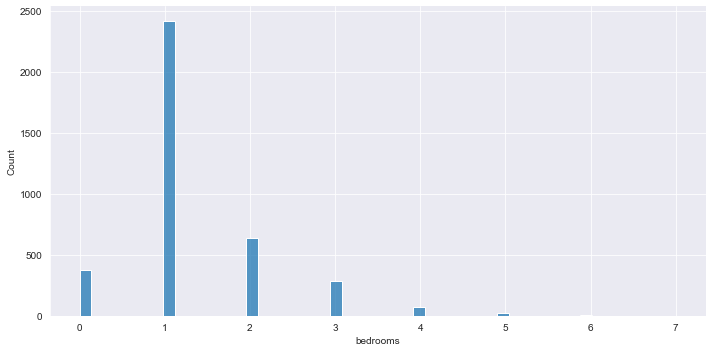

In [10]:
#use Seaborn displot chart to show the bedroom distribution pattern
sns.set_style('darkgrid')
sns.displot(df_prop['bedrooms'], kde=False, bins=50, height=5, aspect=2)

It is interesting to see some properties do not have bedrooms. As shown in the figure above, that 0 bedrooms has a count of roughly 400. It is also obvisous the most availble bedroom type is 1 bedroom. 

#### Q4. Is there a correlation between bedrooms and property_type? What is the most common bedroom? 

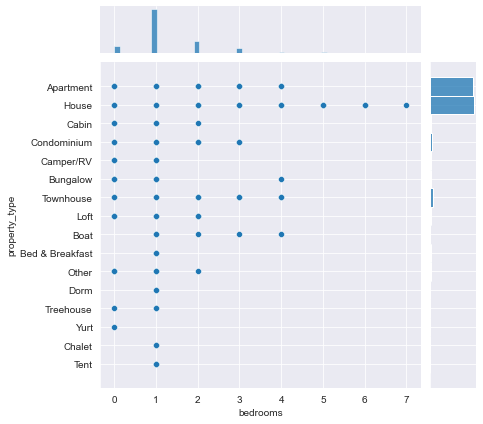

In [11]:
#use Seaborn to do a jointplot chart
sns.jointplot(data=df_prop, x='bedrooms', y='property_type', height=6, ratio=6)

The figure above shows the most commonly available bedroom type is 1 bedroom. All property types except Yurt offers 1 bedroom. House has the most varity of number of bedrooms.


#### Q5. Is there a correlation between property type and review scores rating?

<AxesSubplot:xlabel='review_scores_rating', ylabel='property_type'>

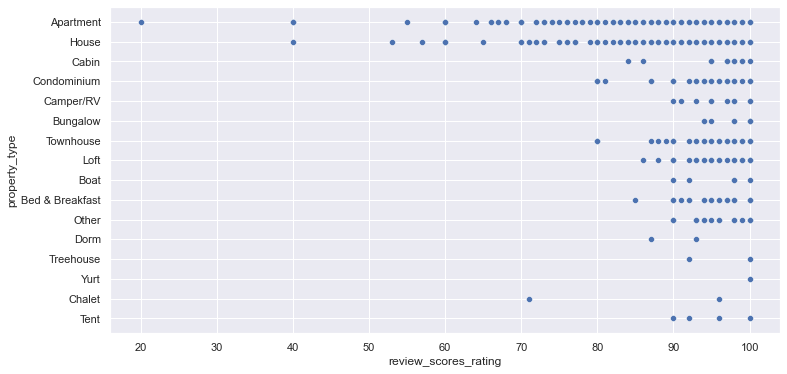

In [12]:
#use Seaborn scatter chart
sns.set(rc={"figure.figsize":(12, 6)})
sns.scatterplot(data=df_prop, y='property_type', x='review_scores_rating')

The figure above shows Apartment has the widest range of review score ratings. House has the second widest range of review score ratings. Most property types have high rating scores.


#### Q6. What are the highest rated property types by neighbourhood group?

In [13]:
#create a pivot table for the df_prop dataframe, then show a heatmap
df_prop_pv = df_prop.pivot_table(index='neighbourhood_group_cleansed', columns='property_type', 
                                 values='review_scores_rating')

<AxesSubplot:xlabel='property_type', ylabel='neighbourhood_group_cleansed'>

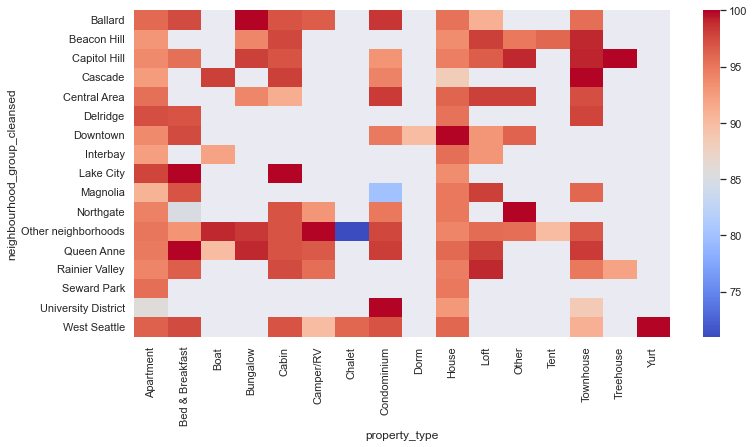

In [14]:
sns.heatmap(df_prop_pv, cmap='coolwarm')

The figure above shows the ratings for townhouse at Beacon Hill, Capitol Hill, Cascade and Queen Anne are very high. Bungalow is another highest rated property type in a few neighbourhood groups, such as Ballard and Queen Anne

#### Q7. Which neighbourhood has the highest numer of properties?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Other neighborhoods'),
  Text(1, 0, 'Capitol Hill'),
  Text(2, 0, 'Downtown'),
  Text(3, 0, 'Central Area'),
  Text(4, 0, 'Queen Anne'),
  Text(5, 0, 'Ballard'),
  Text(6, 0, 'West Seattle'),
  Text(7, 0, 'Rainier Valley'),
  Text(8, 0, 'University District'),
  Text(9, 0, 'Beacon Hill'),
  Text(10, 0, 'Cascade'),
  Text(11, 0, 'Northgate'),
  Text(12, 0, 'Delridge'),
  Text(13, 0, 'Lake City'),
  Text(14, 0, 'Magnolia'),
  Text(15, 0, 'Seward Park'),
  Text(16, 0, 'Interbay')])

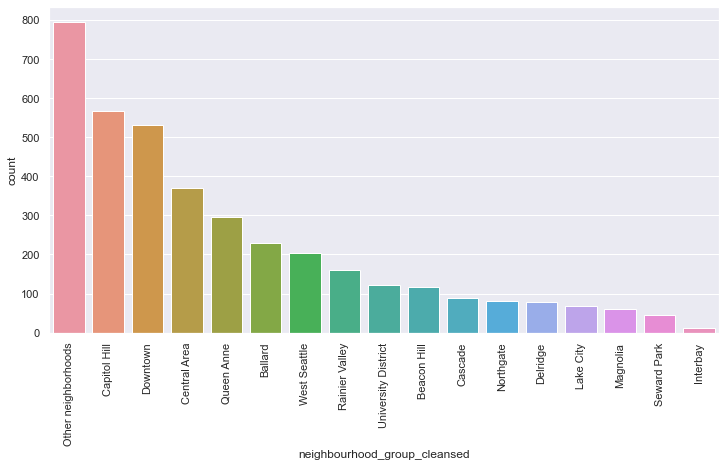

In [15]:
#count the number of properties by neighbourhood group and order the value from high to low
sns.countplot(data=df_prop, 
              x='neighbourhood_group_cleansed', 
              order=df_prop['neighbourhood_group_cleansed'].value_counts().index)
plt.xticks(rotation=90)

The above figure shows that other than "Other neighborhoods", the Capitol Hill neighbourhood group has the highest number of properties. Downtown is pretty close to Capitol Hill in terms of the number of properties. 

## Part 2. Handle missing data

In [16]:
#does the dataset has missing values?
df_prop.isnull().values.any()

True

In [17]:
#Use price as the response column, drop the rows with missing response values
df_prop = df_prop.dropna(subset=['price'], axis=0)

In [18]:
#Drop columns with all NaN values
df_prop = df_prop.dropna(how='all', axis=1)

In [19]:
#check how many missing values we still have in the dataframe
df_prop.isna().sum()

neighbourhood_group_cleansed      0
property_type                     1
bedrooms                          6
review_scores_rating            647
price                             0
dtype: int64

In [20]:
df_prop.shape

(3818, 5)

The above reusult shows
- property_type has 1 missing value out of 3818, we can drop that corresponding row 
- bedrooms and review_scores_rating are columns with numerical values, let's fill missing values with mean

In [21]:
#drop the row that has a missing value in column 'property_type'
df_prop.dropna(subset=['property_type'])

,neighbourhood_group_cleansed,property_type,bedrooms,review_scores_rating,price
0,Queen Anne,Apartment,1.0,95.0,$85.00
1,Queen Anne,Apartment,1.0,96.0,$150.00
2,Queen Anne,House,5.0,97.0,$975.00
3,Queen Anne,Apartment,0.0,NaN,$100.00
4,Queen Anne,House,3.0,92.0,$450.00
...,...,...,...,...,...
3813,Other neighborhoods,House,3.0,80.0,$359.00
3814,Capitol Hill,Apartment,1.0,100.0,$79.00
3815,Rainier Valley,House,1.0,NaN,$93.00
3816,Capitol Hill,Condominium,0.0,NaN,$99.00


In [22]:
#fill missing values with mean
df_prop['bedrooms'].fillna(int(df['bedrooms'].mean()), inplace=True)
df_prop['review_scores_rating'].fillna(int(df['review_scores_rating'].mean()), inplace=True)

## Part 3.  Create model, train the model, use the model to predict price

In [23]:
#define a function to clean price so it can be converted to float in the next step
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [24]:
#Split into explanatory and response variables
X = df_prop[['neighbourhood_group_cleansed', 'property_type', 'bedrooms', 'review_scores_rating']]

#convert price data from currency format to float 
df_prop['price'] = df_prop['price'].apply(clean_currency).astype('float')
y = df_prop['price']

We want to predict a property's price that is impacted by a few features, such as 'neighbourhood_group_cleansed', 'property_type', 'bedrooms', 'review_scores_rating.  
The input is a mixture of categorical and numerical values, and the output is a numerical value. For this, we need to transform the categorical part of the input and leave the numerical input as is. 

In [25]:
#import column transformer and one hot encoder because the features has both categorical and numerical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [26]:
#define the transformer, only transform categorical data, leave the numerical data as is
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), [0, 1])], remainder='passthrough')

# transform the training data
X = transformer.fit_transform(X)

In [27]:
#split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

In [28]:
#Instantiate a model and train the model
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(normalize=True)

In [29]:
#Predict using the model
y_train_preds = lm_model.predict(X_train)  
y_test_preds = lm_model.predict(X_test)

In [30]:
#Score using the model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
print('train score is: ' + str(train_score))
print('test score is: ' + str(test_score))

train score is: 0.4650705023810974
test score is: 0.5093823775347053


model score is not bad :) 

## Part 4.  Now get more insights related to price with visualizations

#### Q8. What is the correlation between review scores rating and price? Is such correlation similar across property types?

<AxesSubplot:xlabel='price', ylabel='review_scores_rating'>

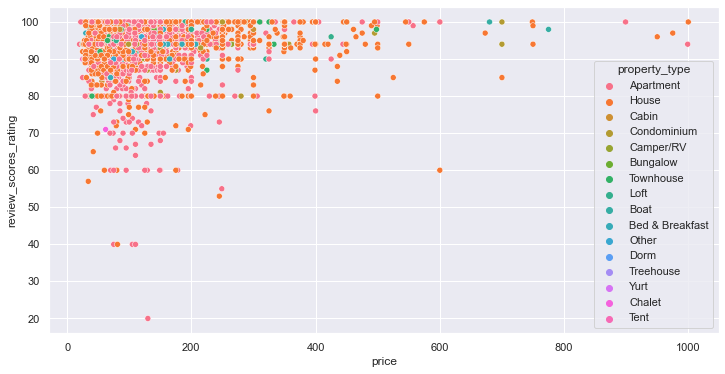

In [31]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.scatterplot(data=df_prop, x='price', y='review_scores_rating', hue='property_type')

The above figure tells us
- The highest ratings are pretty consistent across price levels. Properties with the lowest prices and the highest prices all get high ratings
- The most expensive property is house and it consistently get very high ratings
- Apartment is more on the lower price range and their ratings also varies from lowest to highest

#### Q9.  If we look at rating/price correction by number of bed rooms,  what insights can we find?

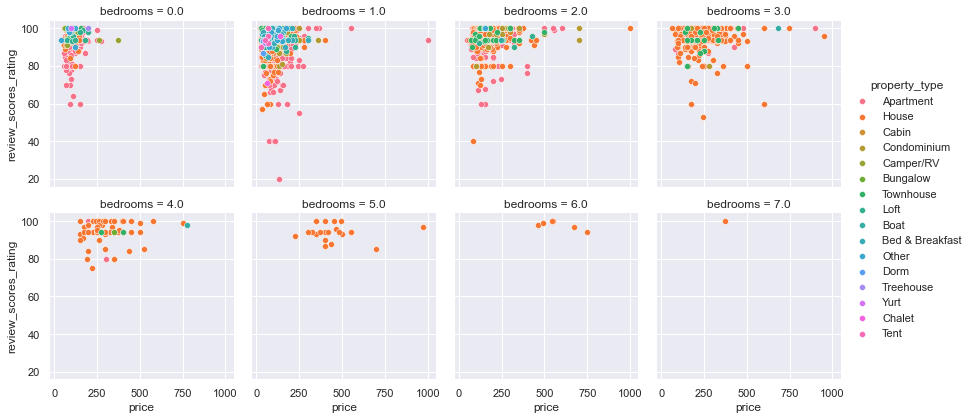

In [32]:
grid = sns.FacetGrid(df_prop, col = "bedrooms", hue='property_type', col_wrap=4)
grid.map(sns.scatterplot, "price", "review_scores_rating")

grid.add_legend()
plt.show()

The above figure tells us
- The ratings seem not much impacted by number of bedrooms 
- House has a variety of number of bedrooms, and they all get pretty high ratings
- 1, 2 and 3 bedrooms seem to be most popular, as we see most data points in these charts

#### Q10.  Now let's focus on Apartment and House, does price vary by neighbourhood?

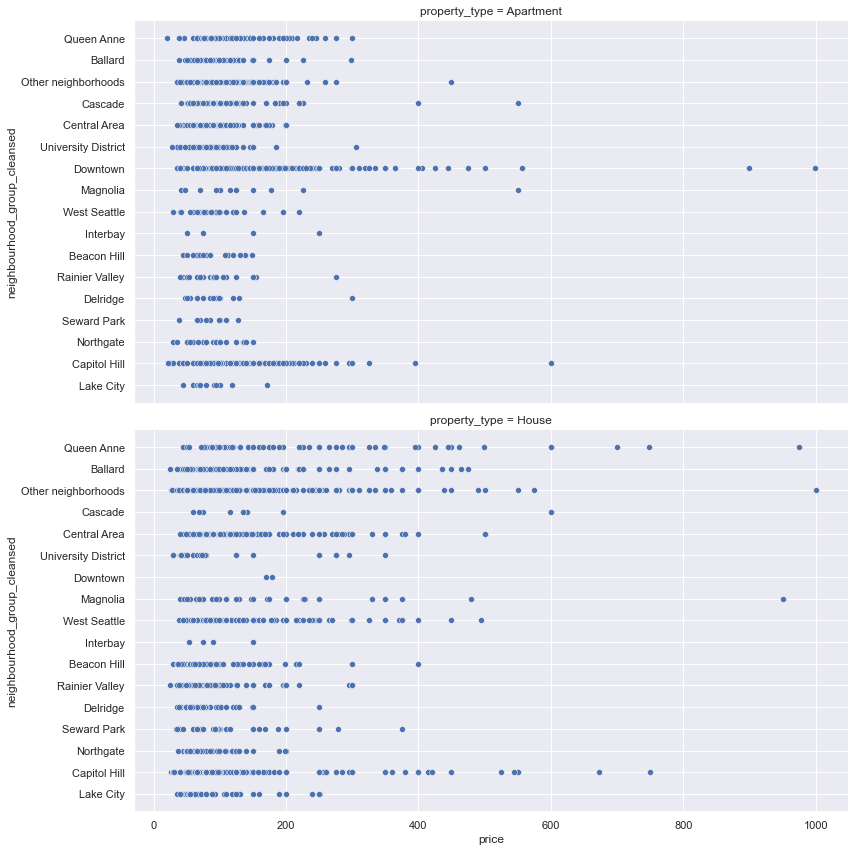

In [33]:
sns.set(rc={"figure.figsize":(18, 24)})
grid = sns.FacetGrid(df_prop[(df_prop['property_type']=='Apartment') | (df_prop['property_type']=='House')], 
                     col = "property_type", col_wrap=1, height=6, aspect=2)
grid.map(sns.scatterplot, "price", "neighbourhood_group_cleansed")
grid.add_legend()
plt.show()

The figure above tells us
- property prices does vary by neighbourhoods (location matters!)
- the most expensive apartments are located in downtown
- the most expensive houses are located in 'Other neighborhoods'. Queen Anne, Magnolia and Capitol Hill appear to be neighbourhoods where Airbnb houses are expensive too